In [5]:
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# to communicate with google spreadsheet...
import gspread
from gspread_dataframe import get_as_dataframe
from gspread_dataframe import set_with_dataframe
from google.oauth2 import service_account # based on google-auth library
import sddk

s = sddk.cloudSession("sciencedata.dk")
# establish connection with gogglesheets...
file_data = s.read_file("https://sciencedata.dk/files/ServiceAccountsKey.json", "dict") # or load it from a local storage: json.load(open("../../ServiceAccountsKey.json", "r"))
credentials = service_account.Credentials.from_service_account_info(file_data)
gc = gspread.Client(auth=credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']))
PIPA_data = gc.open_by_url("https://docs.google.com/spreadsheets/d/1rV4t0_UV_wcx--UAHVwkqB8Wa_5n9mnpV05yGG1OHqk/edit?usp=sharing")

endpoint variable has been configured to: https://sciencedata.dk/files/


In [4]:
keywords = ['λυπέω',
            'λυπηρός',
            'λύπη',
            'ἄλγος',
            'ἄλγημα',
            'ἀλγέω',
            'ὀδύνη',
            'ὀδυνάω',
            'πονέω',
            'πόνος']

In [6]:

os.listdir("../data/")

['keyed_vectors_full.wv',
 'c_hippocraticum_enriched.json',
 'keyed_vectors_excl_arist.wv',
 'c_arist_metadata.csv',
 'c_platonicum.json',
 'c_hip_ratios_by_cat_all.png',
 'ids_lines.pickle',
 'large_data',
 'word_freqs_vocabulary.csv',
 'keyed_vectors.wv',
 'c_aristotelicum.json',
 'c_platonicum_repl.json',
 'vocabulary.pickle',
 'c_aristotelicum_repl.json',
 'matches_pain_words.csv',
 'c_aristotelicum_OVERVIEW.csv',
 'c_hippocraticum_repl.json',
 'keyed_vectors_excl_hipp.wv',
 'keyed_vectors_excl_plato.wv',
 'c_hip_metadata.csv',
 'terms_by_category.csv',
 'word_freqs_all.pickle',
 'c_hippocraticum.json']

In [8]:
most_sim_dfs = []
for fn in ["keyed_vectors_full.wv", "keyed_vectors_excl_arist.wv", "keyed_vectors_excl_plato.wv", "keyed_vectors_excl_hipp.wv"]:
    keyed_vectors = KeyedVectors.load("../data/" + fn)
    mostsimilar_dict = {}
    for keyword in keywords:
        most_similar = [tup[0] + " ({})".format(str(np.round(tup[1], 2))) for tup in keyed_vectors.most_similar(keyword)]
        mostsimilar_dict[keyword] = most_similar
    mostsimilar_df = pd.DataFrame(mostsimilar_dict)
    most_sim_dfs.append(mostsimilar_df)

In [9]:
most_sim_dfs[0]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,χαίρω (0.52),λύπη (0.57),λυπηρός (0.57),τάλας (0.6),ἰξύα (0.71),δακρύω (0.49),ἄλγημα (0.61),μετάφρενον (0.66),ταλαιπωρέω (0.53),πλησμονή (0.54)
1,ἀγανακτέω (0.5),ἡδύς (0.51),ἐπιθυμία (0.54),δύστηνος (0.59),τράχηλος (0.64),ψαύω (0.48),βήξ (0.59),ἰξύα (0.65),ταλαιπωρία (0.47),ταλαιπωρία (0.51)
2,ἥδομαι (0.49),ἀλγεινός (0.51),ἡδονή (0.54),πόθος (0.55),ὑποχόνδριος (0.64),ὀδυνάω (0.48),δίψα (0.58),ἄλγημα (0.62),διαπονέω (0.44),εὐεξία (0.45)
3,ἀπολαύω (0.48),βλαβερός (0.51),ἀλγηδών (0.53),οἰκτρός (0.53),φρικώδης (0.63),βαρύνω (0.47),νείαιρα (0.57),βουβών (0.62),πόνος (0.42),πονέω (0.42)
4,διάκειμαι (0.46),σωματικός (0.46),σωματικός (0.49),τλήμων (0.53),ἀσώδης (0.63),ἀλγεινός (0.45),θέρμη (0.56),τράχηλος (0.62),γυμνάζω (0.42),ἄλγημα (0.42)
5,ἀκόλαστος (0.46),συζάω (0.46),Ἀφροδίσιος (0.45),ἄτη (0.53),κενεών (0.62),ἄλγημα (0.43),στραγγουρία (0.55),ὑποχόνδριος (0.61),εὐεξία (0.41),φῦσα (0.41)
6,κακός (0.46),ἀηδής (0.45),ἀκολασία (0.45),ἄχος (0.52),ὀδυνάω (0.62),νείαιρα (0.42),βουβών (0.55),ὕφαιμος (0.61),δαπανάω (0.41),γυμνάσιον (0.41)
7,ἄχθομαι (0.46),ἀπολαύω (0.45),ἄνοια (0.45),δεῖμα (0.52),κακοήθης (0.62),ἰξύα (0.41),ἰξύα (0.54),πλευρόν (0.6),πλησμονή (0.38),περίπατος (0.4)
8,εὐφραίνω (0.46),λυπέω (0.45),κακός (0.45),στένω (0.51),ὀσφῦς (0.61),ὑποχόνδριος (0.41),ὀδυνάω (0.54),ἤρ (0.6),ἐμποδίζω (0.37),κόπος (0.39)
9,λυπηρός (0.45),κακός (0.43),φόβος (0.44),πῆμα (0.51),ὀδύνη (0.61),λυπέω (0.41),διάρροια (0.54),νείαιρα (0.6),ἰσχναίνω (0.37),σῶμα (0.39)


In [10]:
# excluding Aristotle
most_sim_dfs[1]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,ἀγανακτέω (0.5),λύπη (0.53),ἐπιθυμία (0.66),ἄχος (0.64),ἰξύα (0.79),βαρύνω (0.51),θέρμη (0.68),ἰξύα (0.79),ταλαιπωρέω (0.6),πλησμονή (0.52)
1,λυπηρός (0.49),λυπέω (0.49),ἡδονή (0.6),τάλας (0.64),ὀσφῦς (0.75),ὀδυνάω (0.5),ἄλγημα (0.67),βουβών (0.78),διαπονέω (0.48),ταλαιπωρία (0.48)
2,ἥδομαι (0.47),ἀλγεινός (0.48),λυπηρός (0.53),δύστηνος (0.63),κενεών (0.75),ἀλγεινός (0.47),βήξ (0.66),μετάφρενον (0.77),γυμνάζω (0.44),εὐεξία (0.44)
3,εὐφραίνω (0.47),εὐφραίνω (0.46),ἔρως (0.51),τλήμων (0.62),ὑποχόνδριος (0.75),δακρύω (0.47),στραγγουρία (0.66),κενεών (0.74),πόνος (0.43),πονέω (0.43)
4,ἄχθομαι (0.47),ἡδύς (0.45),θυμός (0.51),πόθος (0.61),τράχηλος (0.74),ὑποχόνδριος (0.45),νείαιρα (0.65),ἄλγημα (0.73),εὐεξία (0.41),ἄσκησις (0.42)
5,διάκειμαι (0.46),ἀηδής (0.45),ἀλγηδών (0.49),μέλεος (0.6),κακοήθης (0.74),βάρος (0.43),δίψα (0.64),νείαιρα (0.72),ἰσχναίνω (0.4),ἀλγηδών (0.4)
6,ἐξαμαρτάνω (0.45),σιωπάω (0.44),κακία (0.48),γόος (0.58),ὀδυνάω (0.73),ψαύω (0.43),διάρροια (0.63),ὕφαιμος (0.72),ἀσθενέω (0.39),δίψα (0.39)
7,πλησιάζω (0.44),πεινάω (0.42),σύμφυτος (0.48),οἰκτρός (0.57),βουβών (0.73),ἧπαρ (0.42),κενεών (0.61),ὀσφῦς (0.71),λυπέω (0.38),ἄλγος (0.38)
8,μισέω (0.44),ἀγαπητός (0.42),ὁμιλία (0.48),δέρκομαι (0.57),φρικώδης (0.73),σπάω (0.42),οἴδημα (0.61),ὑποχόνδριος (0.71),ταλαιπωρία (0.37),πενία (0.37)
9,φοβερός (0.42),ἡδονή (0.41),Ἀφροδίσιος (0.48),στένω (0.57),ὀδυνώδης (0.72),πλευρόν (0.42),βληχρός (0.61),κατάψυξις (0.71),καρτερέω (0.35),ἀκμή (0.37)


In [11]:
# excluding Plato
most_sim_dfs[2]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,εὐφραίνω (0.56),λύπη (0.63),λυπηρός (0.63),τάλας (0.67),ἰξύα (0.8),ὑποχόνδριος (0.48),ἄλγημα (0.69),μετάφρενον (0.75),ταλαιπωρέω (0.6),πλησμονή (0.48)
1,δυσχεραίνω (0.5),ἐπιθυμία (0.55),ἐπιθυμία (0.58),πόθος (0.65),τράχηλος (0.75),πλευρόν (0.47),βήξ (0.65),ἰξύα (0.74),γυμνάζω (0.46),ταλαιπωρία (0.45)
2,ἥδομαι (0.49),ἡδύς (0.54),αἰδώς (0.56),ἀλγεινός (0.63),ὀσφῦς (0.73),ὀδυνάω (0.47),νείαιρα (0.64),βουβών (0.74),ταλαιπωρία (0.44),φῦσα (0.43)
3,ἀγανακτέω (0.49),ἀπολαύω (0.53),σωματικός (0.56),πῆμα (0.59),ὑποχόνδριος (0.72),παραφρονέω (0.46),θέρμη (0.64),κενεών (0.73),διαπονέω (0.42),ἄλγημα (0.41)
4,λοιδορέω (0.49),θαρσαλέος (0.53),ἀκόλαστος (0.53),δύστηνος (0.58),κενεών (0.72),δακρύω (0.46),δίψα (0.63),ἄλγημα (0.71),ἰσχναίνω (0.42),ἄλγος (0.4)
5,ὀργίζω (0.49),ἀκόλαστος (0.51),ἡδονή (0.53),οἰκτρός (0.57),φρικώδης (0.71),ἄλγημα (0.45),βληχρός (0.63),ὕφαιμος (0.71),εὐεξία (0.41),μόχθος (0.4)
6,ἀκόλαστος (0.48),βλαβερός (0.49),ἀκολασία (0.53),ἄχος (0.57),ὀδυνάω (0.71),ψαύω (0.43),οἴδημα (0.62),ὑποχόνδριος (0.7),κινδυνεύω (0.4),δίψα (0.39)
7,σύνοιδα (0.47),ἡδονή (0.49),θυμός (0.52),δεῖμα (0.57),βουβών (0.71),βαρύνω (0.43),στραγγουρία (0.61),τράχηλος (0.7),δαπανάω (0.39),πονέω (0.38)
8,φθονέω (0.47),Ἀφροδίσιος (0.49),λήθη (0.5),τλάω (0.56),μετάφρενον (0.71),πυρεταίνω (0.42),κόπος (0.61),πλευρόν (0.69),ἀσθενέω (0.38),ἐπίπονος (0.38)
9,ἀνάξιος (0.46),φοβερός (0.48),ἀκρασία (0.5),τλήμων (0.54),ὀδύνη (0.69),ἀλγηδών (0.42),ἰξύα (0.61),οἴδημα (0.68),πόνος (0.38),βίοτος (0.36)


In [12]:
# excluding Hippocrates
most_sim_dfs[3]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,ἀκόλαστος (0.52),λύπη (0.61),λυπηρός (0.61),τάλας (0.69),ὀσφῦς (0.79),δακρύω (0.61),ἕλκος (0.67),διαθερμαίνω (0.61),ταλαιπωρέω (0.51),πονέω (0.48)
1,ἥδομαι (0.51),ἡδύς (0.55),ἀλγηδών (0.58),δύστηνος (0.67),ῥάχις (0.78),ἀλγεινός (0.59),ἑλκόω (0.67),βλέφαρον (0.55),δαπανάω (0.51),ἀλγηδών (0.46)
2,χαίρω (0.5),ἀλγεινός (0.54),ἐπιθυμία (0.57),πῆμα (0.63),κνήμη (0.75),πόθος (0.53),φόνιος (0.66),βαρύνω (0.54),γυμνάζω (0.5),πλησμονή (0.44)
3,ἀλγέω (0.5),βλαβερός (0.51),ἡδονή (0.56),τλήμων (0.63),τράχηλος (0.75),ὀδύρομαι (0.53),θανάσιμος (0.63),δακρύω (0.53),πόνος (0.48),εὐεξία (0.43)
4,ἀπολαύω (0.5),ἀλγέω (0.5),σωματικός (0.55),μέλεος (0.63),βουβών (0.74),θυμόω (0.52),νῆστις (0.62),ἰσχναίνω (0.51),καρτερέω (0.46),ἄσκησις (0.43)
5,ἀγανακτέω (0.49),ἀηδής (0.5),ἀκολασία (0.53),πόθος (0.62),στῆθος (0.73),ἄλγος (0.52),ἧπαρ (0.62),πόθος (0.51),διαπονέω (0.45),ῥώμη (0.42)
6,ὀργίζω (0.49),συζάω (0.48),θυμός (0.51),ἄχος (0.62),σφυρόν (0.72),οἰκτρός (0.51),ἄλγος (0.61),πυός (0.5),ῥᾳστώνη (0.43),ἀκμή (0.42)
7,λυπηρός (0.48),λυπέω (0.48),Ἀφροδίσιος (0.51),οἰκτρός (0.62),φλέβιον (0.72),λυπηρός (0.5),ἄτη (0.6),ὕφαιμος (0.49),ἀναλίσκω (0.43),ἀλκή (0.42)
8,διάκειμαι (0.47),παρουσία (0.47),θάρσος (0.48),ὀδύνη (0.61),πλευρόν (0.72),λυπέω (0.5),ὠδίς (0.6),φυράω (0.49),εὐεξία (0.43),πενία (0.41)
9,ἀνόητος (0.45),ἀκρασία (0.46),κακός (0.48),γόος (0.61),χόνδρος (0.72),εὐφραίνω (0.49),κλείς (0.6),στάζω (0.49),μέτριος (0.42),ἐκπονέω (0.4)


In [24]:
#set_with_dataframe(PIPA_data.add_worksheet("mostsimilar", 1,1), mostsimilar_df)

In [14]:
def get_sim_matrix(keyed_vectors, words):
    df = pd.DataFrame(cosine_similarity(keyed_vectors[words]), columns=words, index=words)
    return df

In [16]:
sim_matrices = []
for fn in ["keyed_vectors_full.wv", "keyed_vectors_excl_arist.wv", "keyed_vectors_excl_plato.wv", "keyed_vectors_excl_hipp.wv"]:
    keyed_vectors = KeyedVectors.load("../data/" + fn)
    sim_matrix = get_sim_matrix(keyed_vectors, keywords).round(2)
    sim_matrices.append(sim_matrix)

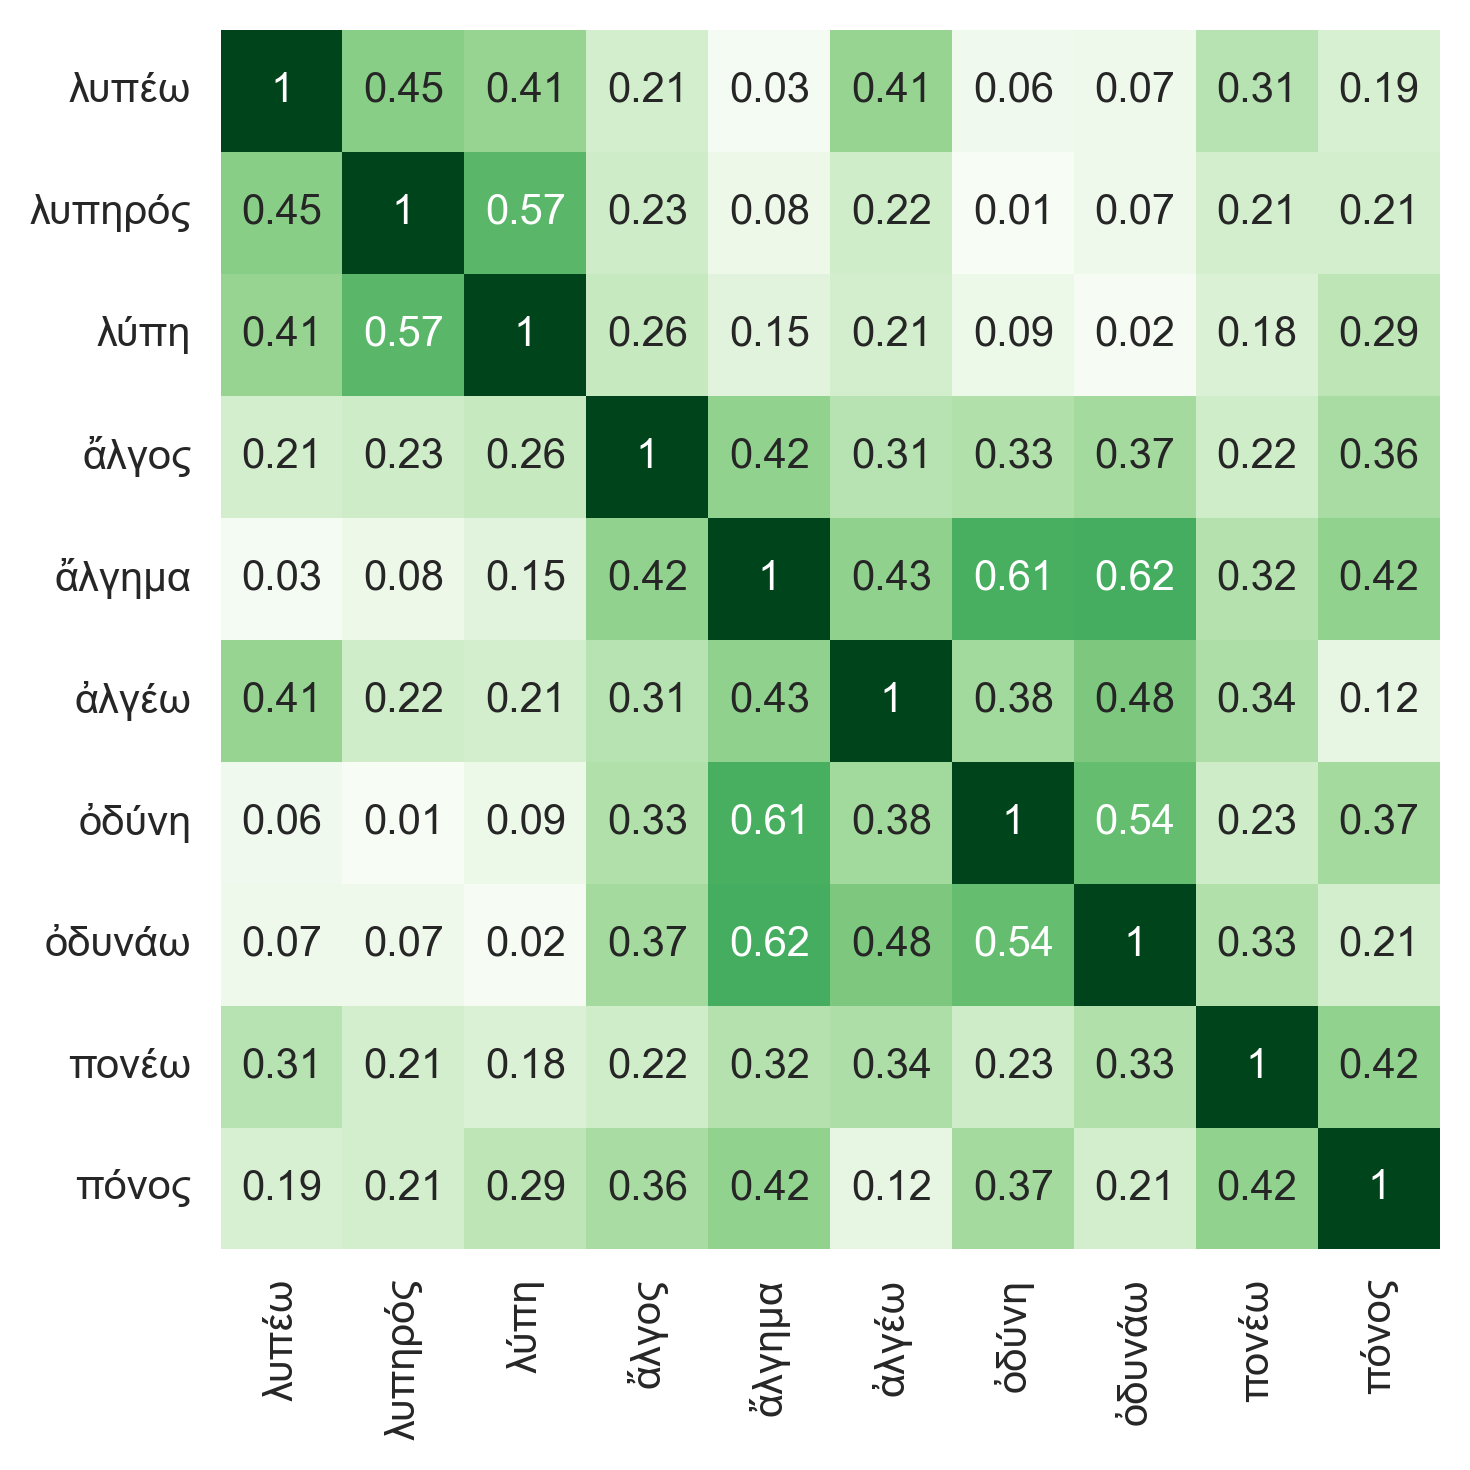

In [17]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300, tight_layout=True)
sns.heatmap(sim_matrices[0], annot=True, cbar=None, cmap="Greens", fmt='g', ax=ax)
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

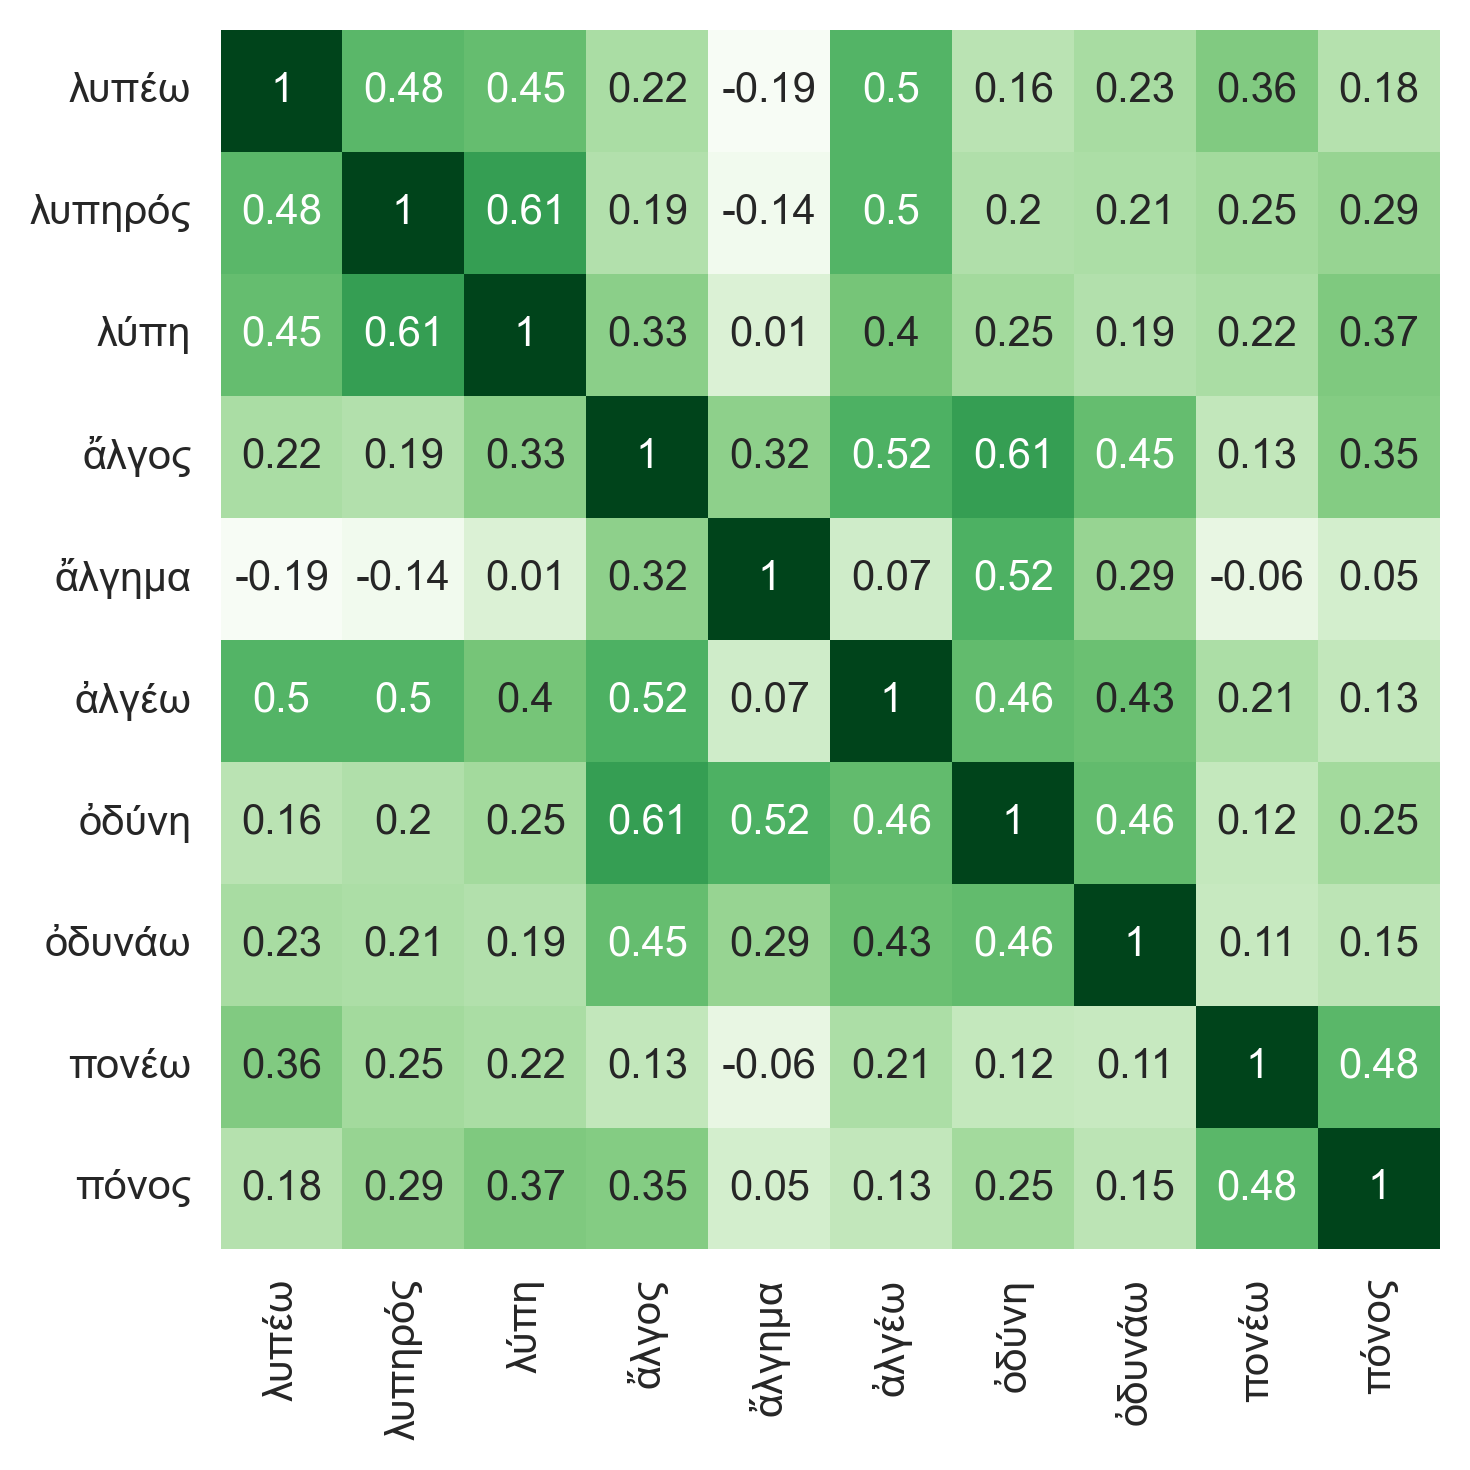

In [18]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300, tight_layout=True)
sns.heatmap(sim_matrices[3], annot=True, cbar=None, cmap="Greens", fmt='g', ax=ax)
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

In [19]:
titles = ["full", "excl. Arist.", "excl. Plato", "excl. Hipp."]

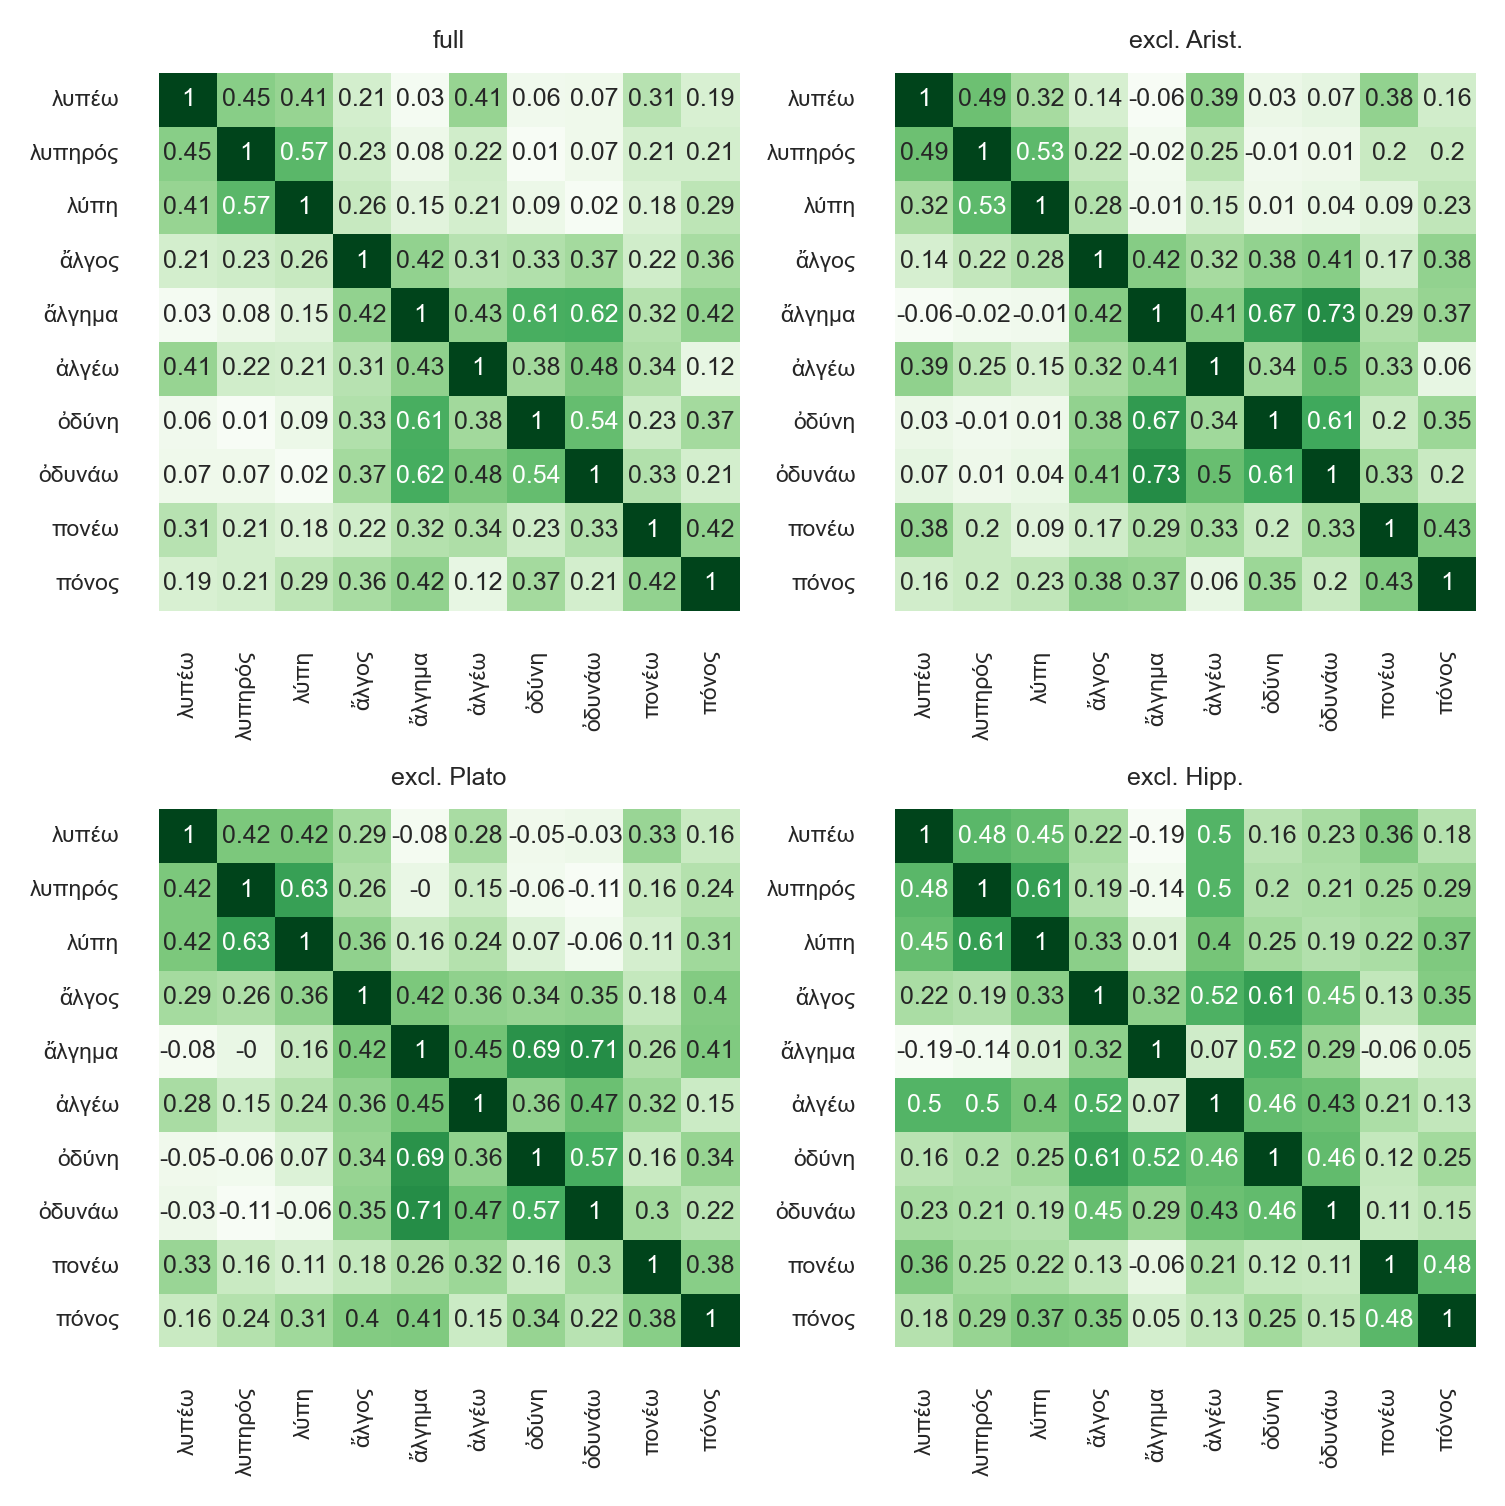

In [27]:
fig, axs = plt.subplots(2,2, figsize=(5, 5), dpi=300, tight_layout=True)
sns.set(font_scale=0.5)
for sim_matrix, ax, title in zip(sim_matrices, axs.ravel(), titles):
    sns.heatmap(sim_matrix, annot=True, cbar=None, cmap="Greens", fmt='g', ax=ax)
    ax.set_title(title)
    ax.set_ylabel("")
    ax.set_xlabel("")
    #plt.show()

In [36]:
sim_diff_excl_arist = (sim_matrices[1] - sim_matrices[0]).apply(abs).round(2)
sim_diff_excl_arist

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
λυπέω,0.00,0.04,0.09,0.07,0.09,0.02,0.03,0.00,0.07,0.03
λυπηρός,0.04,0.00,0.04,0.01,0.10,0.03,0.02,0.06,0.01,0.01
λύπη,0.09,0.04,0.00,0.02,0.16,0.06,0.08,0.02,0.09,0.06
ἄλγος,0.07,0.01,0.02,0.00,0.00,0.01,0.05,0.04,0.05,0.02
ἄλγημα,0.09,0.10,0.16,0.00,0.00,0.02,0.06,0.11,0.03,0.05
ἀλγέω,0.02,0.03,0.06,0.01,0.02,0.00,0.04,0.02,0.01,0.06
ὀδύνη,0.03,0.02,0.08,0.05,0.06,0.04,0.00,0.07,0.03,0.02
ὀδυνάω,0.00,0.06,0.02,0.04,0.11,0.02,0.07,0.00,0.00,0.01
πονέω,0.07,0.01,0.09,0.05,0.03,0.01,0.03,0.00,0.00,0.01
πόνος,0.03,0.01,0.06,0.02,0.05,0.06,0.02,0.01,0.01,0.00


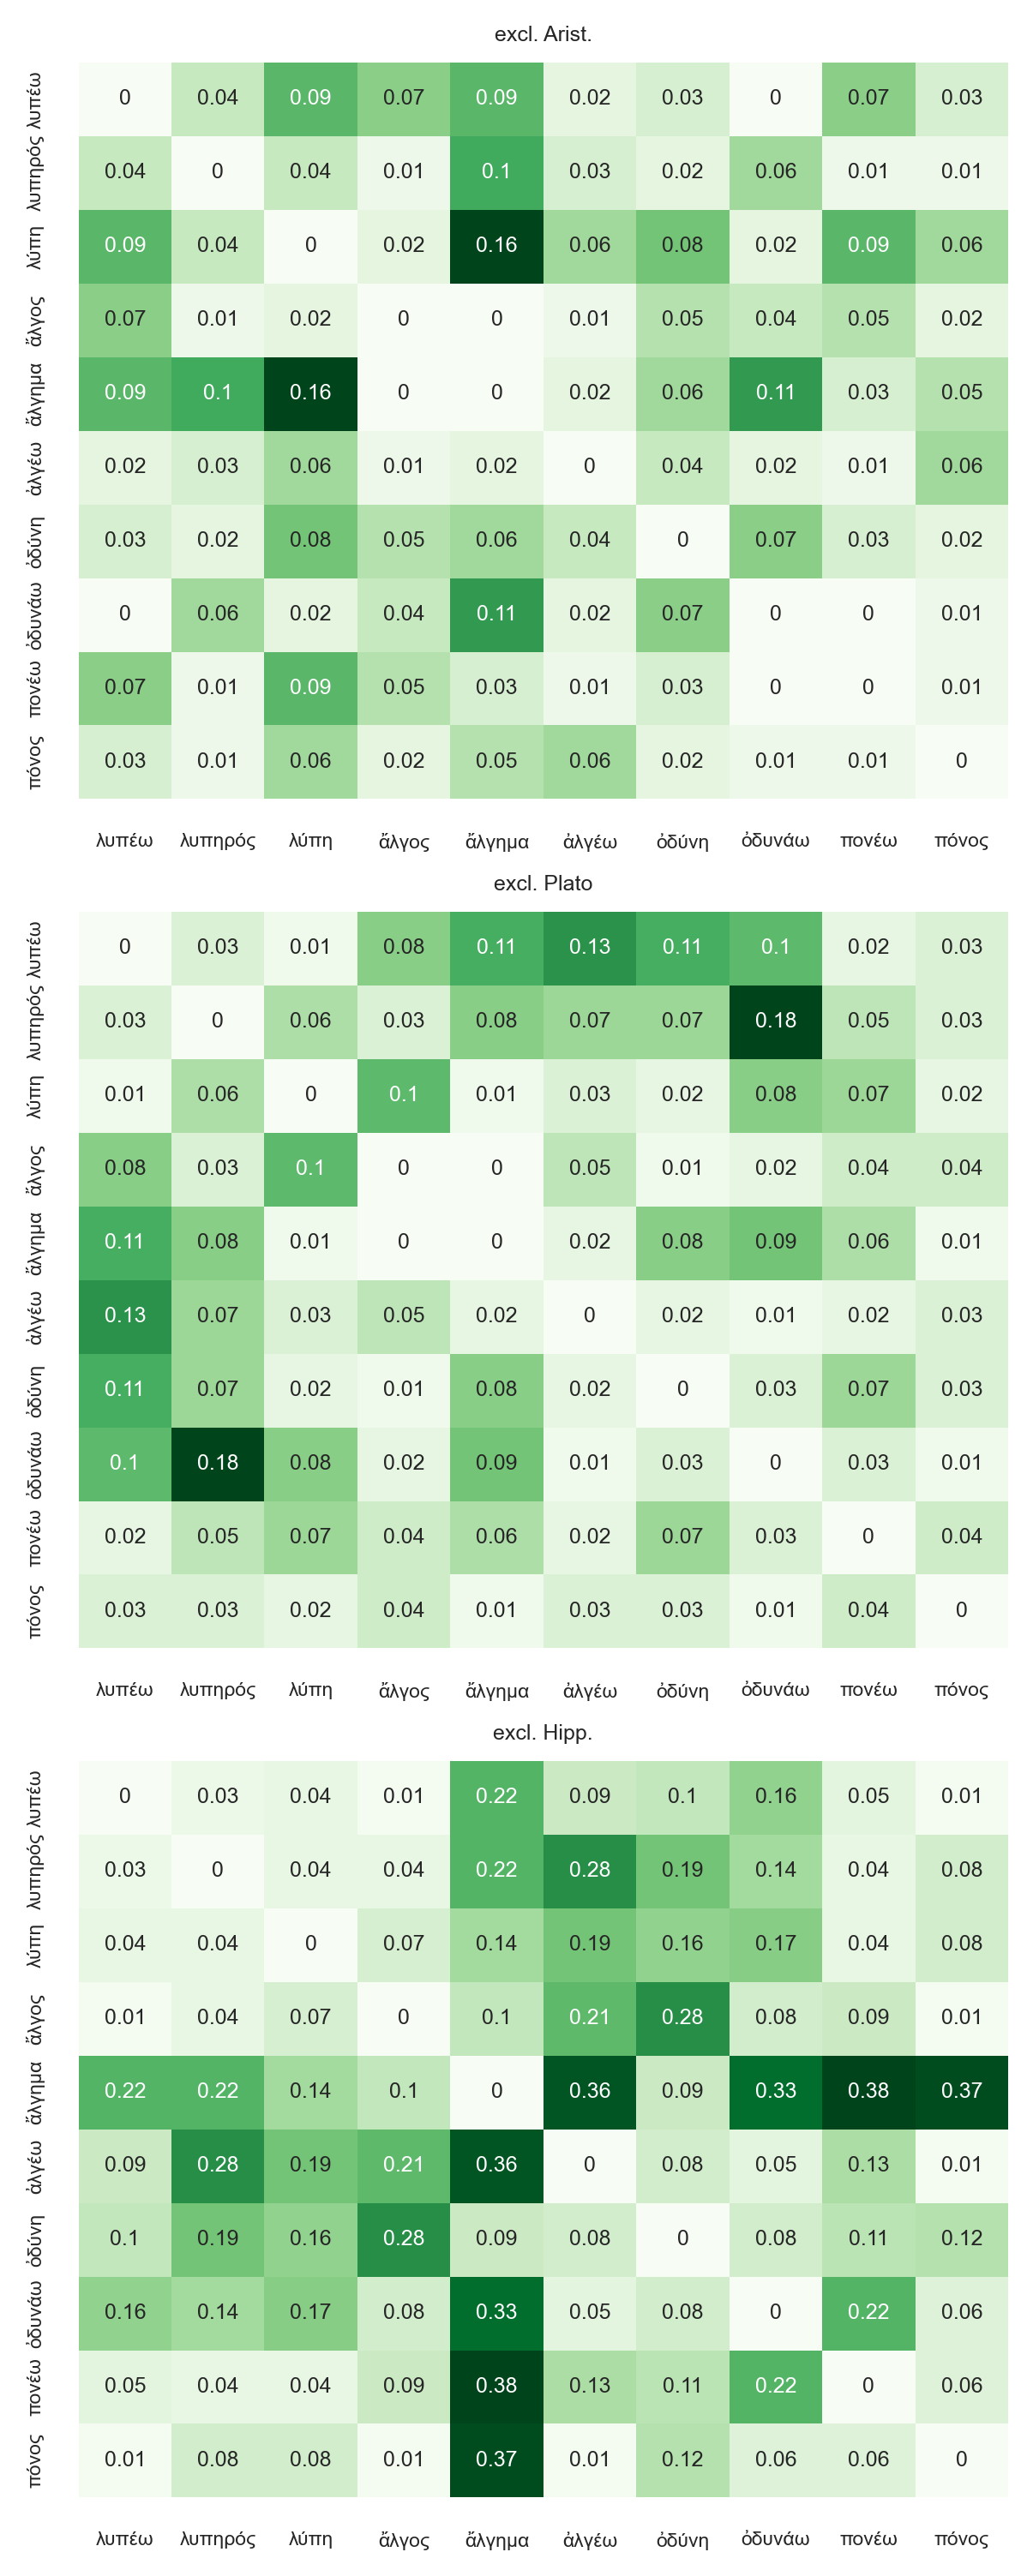

In [41]:
fig, axs = plt.subplots(3, 1, figsize=(4, 10), dpi=300, tight_layout=True)

for sim_matrix, ax, title in zip(sim_matrices[1:], axs.ravel(), titles[1:]):
    sim_diff_excl = (sim_matrix - sim_matrices[0]).apply(abs).round(2)
    sns.heatmap(sim_diff_excl, annot=True, cbar=None, cmap="Greens", fmt='g', ax=ax)
    ax.set_title(title)
    ax.set_ylabel("")
    ax.set_xlabel("")

In [38]:
fig.savefig("../figures/keywords_similarity_matrix.png")